In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
import statsmodels.api as smplot

In [41]:
fmp_news = pd.read_csv('trail_data.csv')
fmp_news.head()

,Unnamed: 0,title,date,content,tickers,image,link,author,site,sentiment
0,0,Tesla’s Price Target Cut at Citi Ahead of Q1 D...,2024-03-27 11:05:00,<p>Citi analysts revised <a href='https://fina...,NASDAQ:TSLA,https://cdn.financialmodelingprep.com/images/f...,https://financialmodelingprep.com/market-news/...,Davit Kirakosyan,Financial Modeling Prep,Negative
1,1,nCino Shares Jump 19% Following Q4 Earnings,2024-03-27 11:03:00,<p><a href='https://financialmodelingprep.com/...,NASDAQ:NCNO,https://cdn.financialmodelingprep.com/images/f...,https://financialmodelingprep.com/market-news/...,Davit Kirakosyan,Financial Modeling Prep,Positive
2,2,Nio Shares Drops 6% Following Slashed Q1 Deliv...,2024-03-27 11:01:00,<p><a href='https://financialmodelingprep.com/...,NYSE:NIO,https://cdn.financialmodelingprep.com/images/f...,https://financialmodelingprep.com/market-news/...,Davit Kirakosyan,Financial Modeling Prep,Negative
3,3,Robinhood Gains 3% on Credit Card Launch Plans,2024-03-27 10:59:00,<p><a href='https://financialmodelingprep.com/...,NASDAQ:HOOD,https://cdn.financialmodelingprep.com/images/f...,https://financialmodelingprep.com/market-news/...,Davit Kirakosyan,Financial Modeling Prep,Positive
4,4,Bloom Energy’s Price Target Cut at Susquehanna,2024-03-27 10:56:00,<p>Susquehanna analysts adjusted their price t...,NYSE:BE,https://cdn.financialmodelingprep.com/images/f...,https://financialmodelingprep.com/market-news/...,Davit Kirakosyan,Financial Modeling Prep,Neutral


In [42]:
fmp_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3739 non-null   int64 
 1   title       3739 non-null   object
 2   date        3739 non-null   object
 3   content     3739 non-null   object
 4   tickers     3680 non-null   object
 5   image       3739 non-null   object
 6   link        3739 non-null   object
 7   author      3739 non-null   object
 8   site        3739 non-null   object
 9   sentiment   3723 non-null   object
dtypes: int64(1), object(9)
memory usage: 292.2+ KB


In [43]:
fmp_news.dropna(inplace=True)
fmp_news['tickers'] = fmp_news['tickers'].str.split(':').str[-1]
fmp_news['tickers'] = fmp_news['tickers'].str.split(', ')
fmp_news = fmp_news.explode('tickers')


In [44]:
fmp_news.dropna(inplace=True)
fmp_news['sentiment'].fillna('', inplace=True)


fmp_news['positive'] = fmp_news['sentiment'].str.contains('positive', case=False).astype(int)
fmp_news['negative'] = fmp_news['sentiment'].str.contains('negative', case=False).astype(int)
fmp_news['neutral'] = fmp_news['sentiment'].str.contains('neutral', case=False).astype(int)

In [45]:
fmp_news = fmp_news[['date', 'tickers', 'positive', 'negative', 'neutral']]
fmp_news['date'] = pd.to_datetime(fmp_news['date'],format = '%Y-%m-%d %H:%M:%S')

In [46]:
# Set the display option to show all unique values without truncation
pd.set_option('display.max_rows', None)
unique_tickers = fmp_news['tickers'].unique()


print(unique_tickers)

['TSLA' 'NCNO' 'NIO' ... 'COO' 'DBI' 'NASDAQ;']


In [47]:
stocks = pd.read_csv('Daily Stock Prices FMP Articles.csv')
stocks = stocks.iloc[:, 1:10]
stocks.head()

C:\Users\joel3\AppData\Local\Temp\ipykernel_2740\830710289.py:1: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  stocks = pd.read_csv('Daily Stock Prices FMP Articles.csv')


,date,SICCD,TICKER,COMNAM,PRIMEXCH,VOL,RET,BID,ASK
0,2020-01-02,7372,ORCL,ORACLE CORP,N,13206090.0,0.018309,53.95,53.96
1,2020-01-03,7372,ORCL,ORACLE CORP,N,11026717.0,-0.003522,53.77,53.78
2,2020-01-06,7372,ORCL,ORACLE CORP,N,10982367.0,0.005208,54.04,54.05
3,2020-01-07,7372,ORCL,ORACLE CORP,N,12037347.0,0.002221,54.16,54.17
4,2020-01-08,7372,ORCL,ORACLE CORP,N,11857642.0,0.003877,54.12,54.13


In [48]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360186 entries, 0 to 360185
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      360186 non-null  object 
 1   SICCD     360186 non-null  object 
 2   TICKER    360186 non-null  object 
 3   COMNAM    360186 non-null  object 
 4   PRIMEXCH  360186 non-null  object 
 5   VOL       360175 non-null  float64
 6   RET       360175 non-null  object 
 7   BID       360175 non-null  float64
 8   ASK       360175 non-null  float64
dtypes: float64(3), object(6)
memory usage: 24.7+ MB


In [49]:
# Convert the 'date' column in stocks dataframe to datetime, if it's not already done
stocks['date'] = pd.to_datetime(stocks['date'], format = '%Y-%m-%d %H:%M:%S')
stocks.head()

,date,SICCD,TICKER,COMNAM,PRIMEXCH,VOL,RET,BID,ASK
0,2020-01-02,7372,ORCL,ORACLE CORP,N,13206090.0,0.018309,53.95,53.96
1,2020-01-03,7372,ORCL,ORACLE CORP,N,11026717.0,-0.003522,53.77,53.78
2,2020-01-06,7372,ORCL,ORACLE CORP,N,10982367.0,0.005208,54.04,54.05
3,2020-01-07,7372,ORCL,ORACLE CORP,N,12037347.0,0.002221,54.16,54.17
4,2020-01-08,7372,ORCL,ORACLE CORP,N,11857642.0,0.003877,54.12,54.13


In [50]:
fmp_news['date'] = pd.to_datetime(fmp_news['date']).dt.date
stocks['date'] = pd.to_datetime(stocks['date']).dt.date

merged_df = pd.merge(fmp_news, stocks, how='left', left_on=['date', 'tickers'], right_on=['date', 'TICKER'])
merged_df.head()

,date,tickers,positive,negative,neutral,SICCD,TICKER,COMNAM,PRIMEXCH,VOL,RET,BID,ASK
0,2024-03-27,TSLA,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-27,NCNO,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-03-27,NIO,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-27,HOOD,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-27,BE,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3739 entries, 0 to 3738
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3739 non-null   object 
 1   tickers   3739 non-null   object 
 2   positive  3739 non-null   int32  
 3   negative  3739 non-null   int32  
 4   neutral   3739 non-null   int32  
 5   SICCD     1565 non-null   object 
 6   TICKER    1565 non-null   object 
 7   COMNAM    1565 non-null   object 
 8   PRIMEXCH  1565 non-null   object 
 9   VOL       1565 non-null   float64
 10  RET       1565 non-null   object 
 11  BID       1565 non-null   float64
 12  ASK       1565 non-null   float64
dtypes: float64(3), int32(3), object(7)
memory usage: 365.1+ KB


In [52]:
merged_df.dropna().head()

,date,tickers,positive,negative,neutral,SICCD,TICKER,COMNAM,PRIMEXCH,VOL,RET,BID,ASK
353,2023-12-29,UBER,0,1,0,4119,UBER,UBER TECHNOLOGIES INC,N,21615424.0,-0.024865,61.57000,61.58000
354,2023-12-29,LULU,1,0,0,5600,LULU,LULULEMON ATHLETICA INC,Q,906327.0,0.004065,511.26001,511.48001
355,2023-12-29,CCL,0,0,1,6719,CCL,CARNIVAL CORP,N,25436669.0,-0.006963,18.55000,18.56000
356,2023-12-29,LYFT,0,1,0,9999,LYFT,LYFT INC,Q,13893756.0,-0.035393,14.98000,14.99000
357,2023-12-29,JBL,0,1,0,3672,JBL,JABIL INC,N,1633853.0,-0.004532,127.42000,127.43000


In [53]:
#merged_df.to_csv("fmp articles and finance sample.csv")

In [54]:
merged_df.columns

Index(['date', 'tickers', 'positive', 'negative', 'neutral', 'SICCD', 'TICKER',
       'COMNAM', 'PRIMEXCH', 'VOL', 'RET', 'BID', 'ASK'],
      dtype='object')

                    count      mean       std       min       25%       50%  \
sentiment_category                                                            
negative            427.0 -0.044925  0.083753 -0.643590 -0.077113 -0.023917   
neutral             401.0  0.004019  0.052509 -0.245307 -0.016056  0.001240   
positive            737.0  0.027865  0.072699 -0.176157 -0.008920  0.010448   

                         75%       max  
sentiment_category                      
negative            0.003940  0.121755  
neutral             0.021854  0.418968  
positive            0.041749  0.560206  


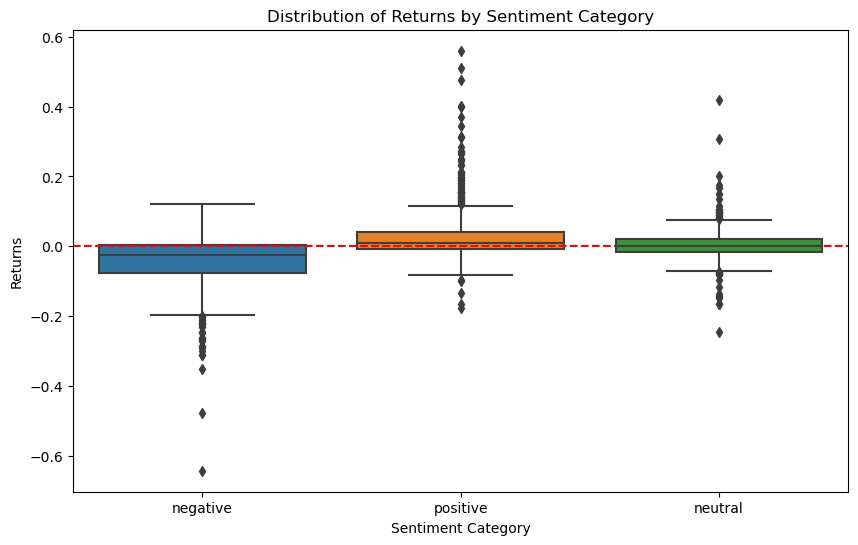

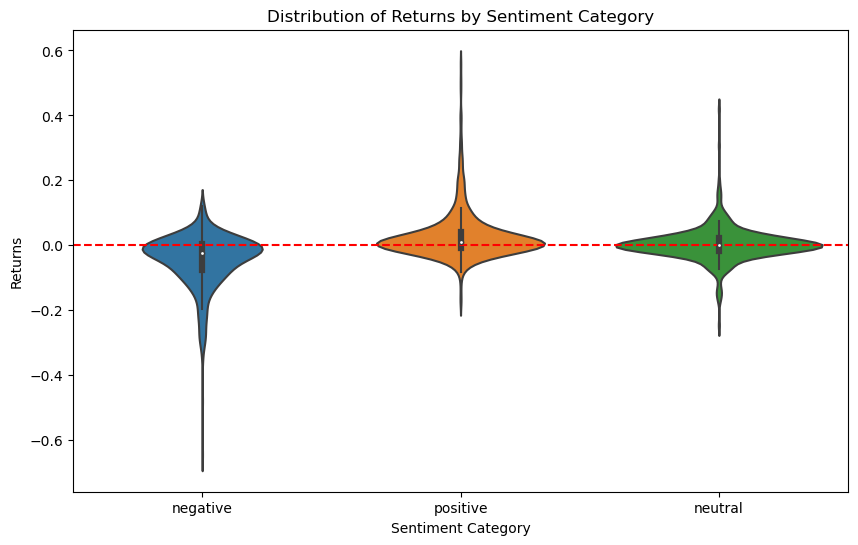

In [55]:
merged_df['RET'] = pd.to_numeric(merged_df['RET'], errors='coerce')

merged_df.dropna(subset=['RET'], inplace=True)

merged_df['sentiment_category'] = ''
merged_df.loc[merged_df['positive'] == 1, 'sentiment_category'] = 'positive'
merged_df.loc[merged_df['negative'] == 1, 'sentiment_category'] = 'negative'
merged_df.loc[merged_df['neutral'] == 1, 'sentiment_category'] = 'neutral'

result = merged_df.groupby('sentiment_category')['RET'].describe()

print(result)

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='RET', data=merged_df)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Returns')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment_category', y='RET', data=merged_df)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Distribution of Returns by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Returns')
plt.show()


C:\Users\joel3\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\joel3\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\joel3\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\joel3\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\joel3\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.9% of the points cann

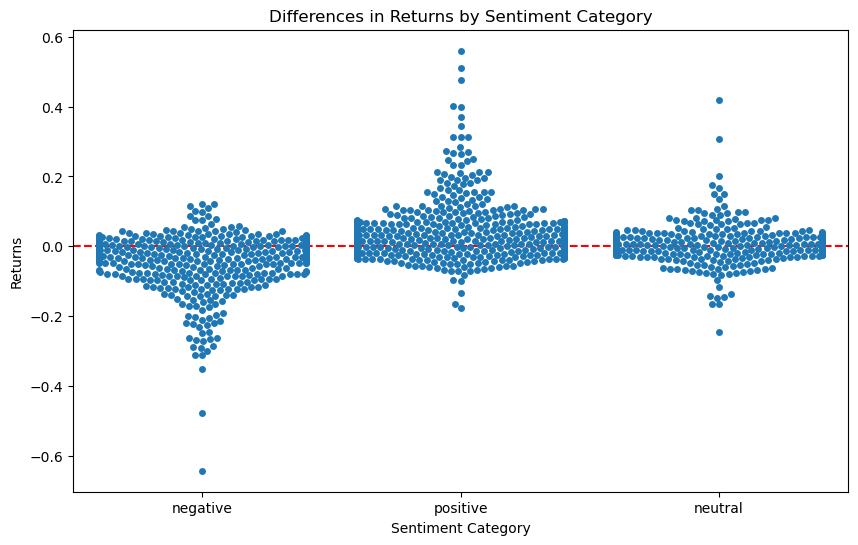

In [56]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='sentiment_category', y='RET', data=merged_df)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Differences in Returns by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Returns')
plt.show()

In [59]:
new_df = merged_df.copy()

new_df['date'] = pd.to_datetime(merged_df['date']) + pd.DateOffset(days=1)

new_df.rename(columns={'positive': 'yesterday_positive', 
                       'negative': 'yesterday_negative', 
                       'neutral': 'yesterday_neutral'}, inplace=True)

new_df = new_df[['date', 'yesterday_positive', 'yesterday_negative', 'yesterday_neutral', 'SICCD', 'TICKER', 'COMNAM', 'PRIMEXCH']]

print(new_df.head())


          date  yesterday_positive  yesterday_negative  yesterday_neutral  \
353 2023-12-30                   0                   1                  0   
354 2023-12-30                   1                   0                  0   
355 2023-12-30                   0                   0                  1   
356 2023-12-30                   0                   1                  0   
357 2023-12-30                   0                   1                  0   

    SICCD TICKER                   COMNAM PRIMEXCH  
353  4119   UBER    UBER TECHNOLOGIES INC        N  
354  5600   LULU  LULULEMON ATHLETICA INC        Q  
355  6719    CCL            CARNIVAL CORP        N  
356  9999   LYFT                 LYFT INC        Q  
357  3672    JBL                JABIL INC        N  


In [60]:
new_df['date'] = pd.to_datetime(new_df['date']).dt.date
stocks['date'] = pd.to_datetime(stocks['date']).dt.date

tomorrow_df = pd.merge(new_df, stocks, how='left', on=['date', 'TICKER', 'SICCD', 'COMNAM', 'PRIMEXCH'])
tomorrow_df.head()

,date,yesterday_positive,yesterday_negative,yesterday_neutral,SICCD,TICKER,COMNAM,PRIMEXCH,VOL,RET,BID,ASK
0,2023-12-30,0,1,0,4119,UBER,UBER TECHNOLOGIES INC,N,NaN,NaN,NaN,NaN
1,2023-12-30,1,0,0,5600,LULU,LULULEMON ATHLETICA INC,Q,NaN,NaN,NaN,NaN
2,2023-12-30,0,0,1,6719,CCL,CARNIVAL CORP,N,NaN,NaN,NaN,NaN
3,2023-12-30,0,1,0,9999,LYFT,LYFT INC,Q,NaN,NaN,NaN,NaN
4,2023-12-30,0,1,0,3672,JBL,JABIL INC,N,NaN,NaN,NaN,NaN


In [61]:
tomorrow_df.dropna()
tomorrow_df.shape

(1585, 12)

                    count      mean       std       min       25%       50%  \
sentiment_category                                                            
yesterday_negative  347.0  0.004937  0.042185 -0.107712 -0.016443  0.001419   
yesterday_neutral   338.0 -0.001203  0.044638 -0.351166 -0.016336  0.000822   
yesterday_positive  592.0  0.000231  0.031864 -0.212959 -0.016241  0.000896   

                         75%       max  
sentiment_category                      
yesterday_negative  0.018808  0.366906  
yesterday_neutral   0.017880  0.311864  
yesterday_positive  0.014640  0.176844  


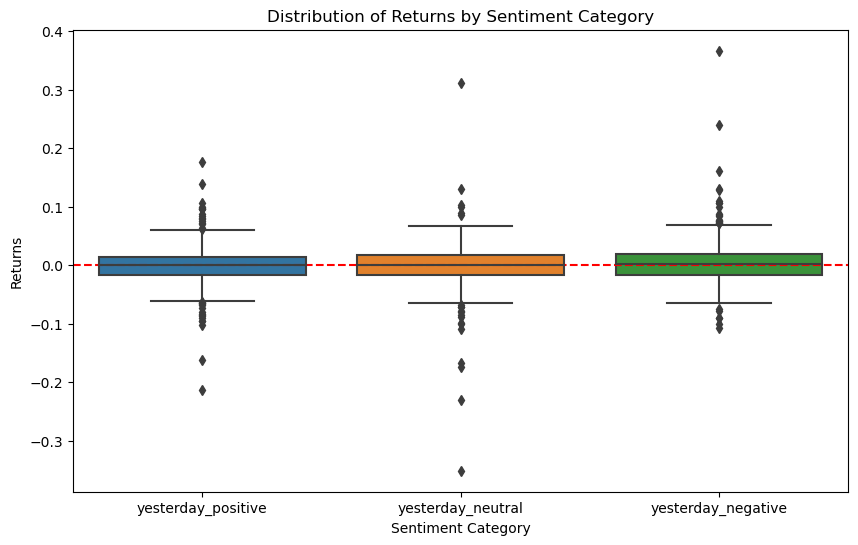

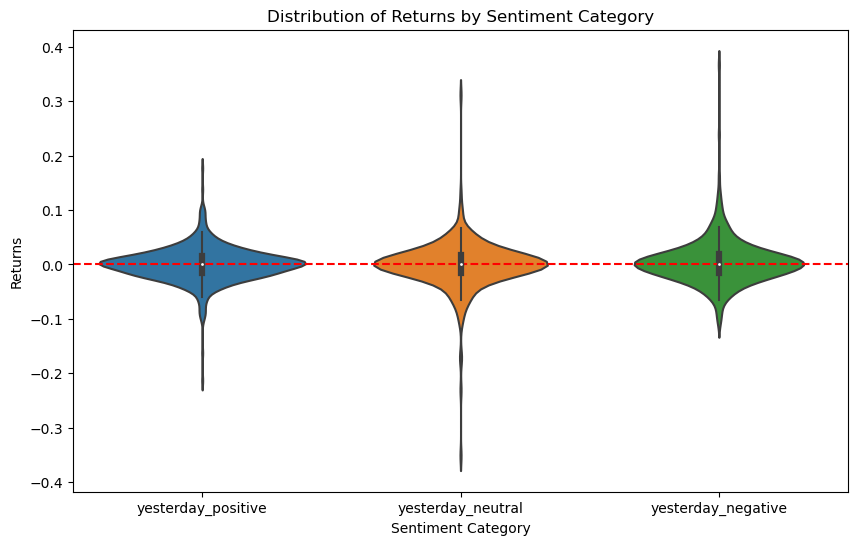

In [63]:
tomorrow_df['RET'] = pd.to_numeric(tomorrow_df['RET'], errors='coerce')

tomorrow_df.dropna(subset=['RET'], inplace=True)

tomorrow_df['sentiment_category'] = ''
tomorrow_df.loc[tomorrow_df['yesterday_positive'] == 1, 'sentiment_category'] = 'yesterday_positive'
tomorrow_df.loc[tomorrow_df['yesterday_negative'] == 1, 'sentiment_category'] = 'yesterday_negative'
tomorrow_df.loc[tomorrow_df['yesterday_neutral'] == 1, 'sentiment_category'] = 'yesterday_neutral'

result = tomorrow_df.groupby('sentiment_category')['RET'].describe()

print(result)

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='RET', data=tomorrow_df)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Returns')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment_category', y='RET', data=tomorrow_df)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Distribution of Returns by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Returns')
plt.show()